# Working with time series, frequency series, and unit conversion

In this notebook, we show some of the most useful features of the [timeseries](../series.rst) module. To do so, we will analyze a fake gravitational-wave signal. We will also show the [frequencyseries](../series.rst) module and the [unitconv](../unitconv.rst) modules.

First, let's generate this signal. 

(This notebook is meant to be converted in Sphinx documentation and not used directly.)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit import timeseries as ts
from kuibit import series
from kuibit import unitconv as uc
from kuibit.gw_utils import luminosity_distance_to_redshift

%matplotlib inline

In [2]:
t = np.linspace(0, 20, 5000)
y = np.sin(t)

# Generate a TimeSeries by providing the times and the values of the series
gw = ts.TimeSeries(t, y)

To access the times and the values, use ``gw.t`` and ``gw.y``. You can also iterate over the series with a for loop yielding the elements `(t, y)` at each iteration of the loop. For example.

In [3]:
for tt, yy in gw:
    print(tt, yy)

0.0 0.0
0.004000800160032006 0.004000789486971321
0.008001600320064013 0.008001514935783532
0.012002400480096018 0.012002112309302542
0.016003200640128026 0.016002517572444287
0.020004000800160033 0.020002666693199687
0.024004800960192037 0.024002495643659576
0.028005601120224044 0.028001940401039562
0.03200640128025605 0.03200093694870479
0.03600720144028806 0.03599942127719461
0.040008001600320066 0.03999732938524717
0.04400880176035207 0.0439945972808238
0.048009601920384073 0.04799116098213332
0.05201040208041608 0.05198695651865616
0.05601120224044809 0.055981919932168285
0.060012002400480095 0.059975987277764924
0.0640128025605121 0.06396909462488413
0.0680136027205441 0.06796117805833003
0.07201440288057612 0.07195217367929596
0.07601520304060812 0.07594201760638712
0.08001600320064013 0.07993064597664322
0.08401680336067213 0.08391799494656059
0.08801760352070415 0.08790400069311417
0.09201840368073615 0.09188859941477902
0.09601920384076815 0.09587172733255157
0.10002000400080

-0.8558754014109103
4.172834566913383 -0.8579376882801466
4.176835367073415 -0.8599862426722389
4.180836167233447 -0.8620210317972459
4.184836967393479 -0.8640420230855584
4.188837767553511 -0.866049184188421
4.192838567713543 -0.868042482978449
4.196839367873575 -0.8700218875501434
4.200840168033607 -0.8719873662204013
4.204840968193639 -0.8739388875290232
4.208841768353671 -0.8758764202392163
4.212842568513703 -0.8777999333380946
4.216843368673735 -0.8797093960371755
4.220844168833767 -0.8816047777728723
4.224844968993799 -0.8834860482069836
4.228845769153831 -0.885353177227179
4.232846569313863 -0.8872061349474807
4.236847369473895 -0.8890448917087423
4.240848169633927 -0.8908694180791232
4.244848969793959 -0.8926796848545602
4.248849769953991 -0.8944756630592342
4.252850570114023 -0.8962573239460345
4.256851370274055 -0.898024638997019
4.260852170434087 -0.8997775799238703
4.264852970594119 -0.9015161186683489
4.268853770754151 -0.9032402274027421
4.272854570914183 -0.9049498785303

0.9918682907924117
7.985597119423884 0.9913511778492509
7.989597919583916 0.9908181969618587
7.993598719743948 0.9902693566613302
7.99759951990398 0.9897046657326121
8.001600320064012 0.9891241332143622
8.005601120224044 0.9885277683988051
8.009601920384076 0.9879155808315828
8.013602720544108 0.9872875803116026
8.01760352070414 0.9866437768908798
8.021604320864173 0.9859841808743769
8.025605121024205 0.9853088028198388
8.029605921184237 0.9846176535376236
8.033606721344269 0.98391074409053
8.0376075215043 0.9831880857936194
8.041608321664333 0.9824496902140356
8.045609121824365 0.9816955691708192
8.049609921984397 0.9809257347347187
8.053610722144429 0.9801401992279969
8.05761152230446 0.9793389752242343
8.061612322464493 0.9785220755481271
8.065613122624525 0.9776895132752824
8.069613922784557 0.9768413017320088
8.073614722944589 0.9759774544951031
8.07761552310462 0.975097985391633
8.081616323264653 0.9742029084987154
8.085617123424685 0.9732922381432919
8.089617923584717 0.97236598

-0.26085727997245023
12.30646129225845 -0.2569929206222547
12.310462092418483 -0.2531244477455678
12.314462892578515 -0.24925192326263876
12.318463692738547 -0.2453754091585681
12.322464492898579 -0.24149496748231591
12.326465293058611 -0.23761066034570844
12.330466093218643 -0.23372254992244393
12.334466893378675 -0.22983069844709758
12.338467693538707 -0.22593516821412515
12.342468493698739 -0.22203602157686614
12.346469293858771 -0.2181333209465455
12.350470094018803 -0.21422712879127476
12.354470894178835 -0.21031750763505214
12.358471694338867 -0.20640452005676174
12.362472494498899 -0.20248822868917196
12.366473294658931 -0.19856869621793277
12.370474094818963 -0.19464598538057262
12.374474894978995 -0.19072015896549405
12.378475695139027 -0.18679127981096866
12.38247649529906 -0.18285941080413143
12.386477295459091 -0.17892461487997405
12.390478095619123 -0.17498695502033754
12.394478895779155 -0.17104649425290416
12.398479695939187 -0.1671032956501886
12.40248049609922 -0.16315

-0.41801992654657527
16.143228645729145 -0.4216510496835688
16.147229445889177 -0.4252754237133934
16.15123024604921 -0.42889299062293884
16.15523104620924 -0.4325036925080526
16.159231846369273 -0.436107471574466
16.163232646529305 -0.43970427013872
16.167233446689337 -0.4432940306290878
16.17123424684937 -0.4468766955864969
16.1752350470094 -0.4504522076654485
16.179235847169434 -0.4540205096349356
16.183236647329466 -0.45758154437935883
16.187237447489498 -0.4611352548994409
16.19123824764953 -0.4646815843131387
16.19523904780956 -0.4682204758565541
16.199239847969594 -0.47175187288484216
16.203240648129626 -0.4752757188731182
16.207241448289658 -0.47879195741736225
16.21124224844969 -0.48230053223532193
16.21524304860972 -0.4858013871674135
16.219243848769754 -0.48929446617762057
16.223244648929786 -0.49277971335439114
16.227245449089818 -0.49625707291153254
16.23124624924985 -0.4997264891891043
16.23524704940988 -0.5031879066543091
16.239247849569914 -0.5066412699023818
16.2432486

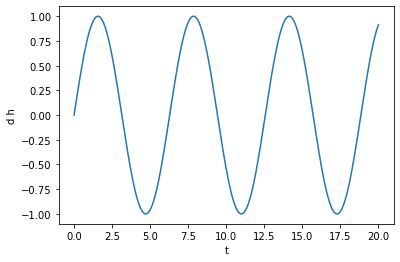

In [4]:
def plot(ser, lab1="d h", lab2="t", *args, **kwargs):
    """Plot Series ser with labels"""
    plt.ylabel(lab1)
    plt.xlabel(lab2)
    plt.plot(ser, *args, **kwargs)
    
plot(gw)

Let's make this more interesting: we square the signal and add Gaussian noise. [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) support directly using all the basic mathematical operations in Python and NumPy, so we can easily square the signal and add another TimeSeries to it.

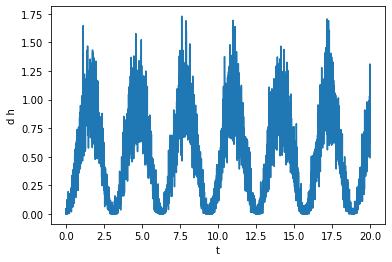

In [5]:
noise = np.random.normal(0, 0.1, len(gw))  # Here we used len() on the TimeSeries
noise_ts = ts.TimeSeries(t, noise)

gw += noise_ts
gw **= 2

plot(gw)

To analyze this signal, first we will smooth it. To do that, we will use the [savgol_smooth_time](../timeseries_ref.html#kuibit.timeseries.TimeSeries.savgol_smooth_time) method, which is a generalized "running average" filter. This method requires length of time over which we want to smooth the data.

In [TimeSeries](../timeseries_ref.html#kuibit.timeseries.TimeSeries) there are always two different methods to do the same task, one with imperative verb (e.g., smooth), and the other with the past tense (e.g., smoothed). The first modifies the data, the second returns a new `TimeSeries` with the operation applied. Here, we will find what smoothing length to use by trial and error, so we will use the second method. 

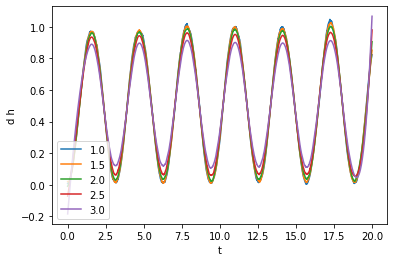

In [6]:
tsmooth = np.linspace(1, 3, 5)

for tsm in tsmooth:
    smoothed = gw.savgol_smoothed_time(tsm)
    plot(smoothed, label=tsm)
plt.legend()

From visual inspection it looks like that ``tsmooth = 1.5`` will work yield a clean series faithful to the original one.

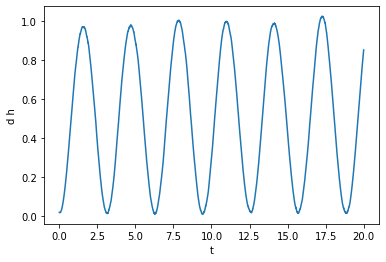

In [7]:
gw.savgol_smooth_time(1.5)
plot(gw)

Next, for fun, we can compute integrals and derivatives. For instance, we can compute what is the integral from 5 to 10.

The integral from 5 to 10 is 2.1986


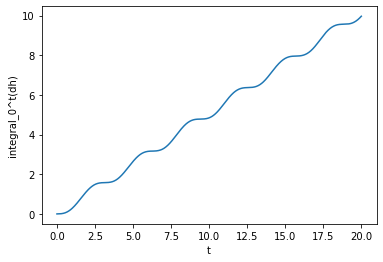

In [8]:
gw_int = gw.integrated()
a = 5
b = 10
print(f"The integral from {a} to {b} is {gw_int(b) - gw_int(a):.4f}")
plot(gw_int, lab1="integral_0^t(dh)")

Here, we showed a very powerful feature of `TimeSeries`: you can call them on a specific time (as we did we ``gw_int(b)``). This is done using splines to interpolate to the points that are not available. Splines can also be used to take derivatives. Alternatively, one can simply take the finite (central) difference. Let's see what's the derivative of ``gw`` using splines and finite difference.

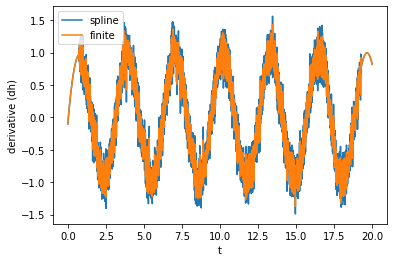

In [9]:
gw_spline_der = gw.spline_differentiated()
gw_numer_der = gw.differentiated()

plot(gw_spline_der, label='spline')
plot(gw_numer_der, lab1="derivative (dh)", label='finite')
plt.legend()

Clearly, derivatives will be noisier than the actual data, so often it is convenient to smooth them out as shown before.

TimeSeries support complex signals. Now, we will create one using `gw` itself. We will copy `gw`, time-shift it, find the common time interval with the original `gw`, and use that as a the imaginary part.

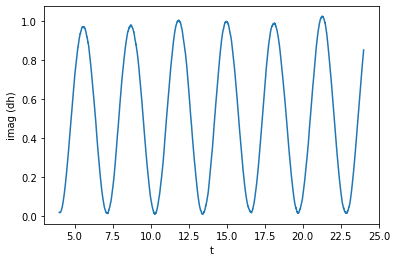

In [10]:
gw_imag = gw.copy()  # It is important to deep copy the object
gw_imag.time_shift(4)

plot(gw_imag, lab1 ="imag (dh)")

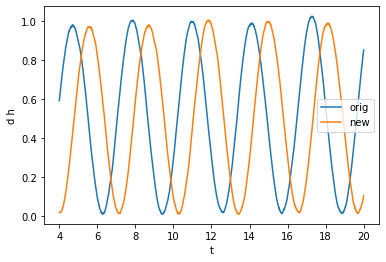

In [11]:
gw, gw_imag = series.sample_common([gw, gw_imag], resample=True)  # Resampling to common times

plot(gw, label="orig")
plot(gw_imag, label="new")
plt.legend()

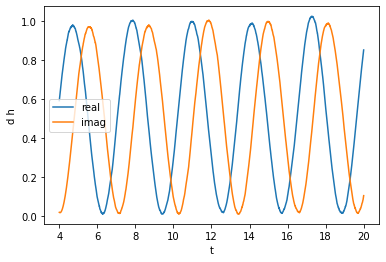

In [12]:
gw_complex = ts.TimeSeries(gw.t, gw.y + 1j * gw_imag.y)

plot(gw_complex.real(), label="real")
plot(gw_complex.imag(), label="imag")
plt.legend()

We can also compute the phase and absolute value. In particular, we will compute the unfolded phase (no wrapping over $2\pi$)

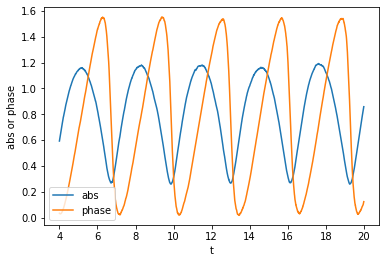

In [13]:
plot(gw_complex.abs(), label='abs')
plot(gw_complex.unfolded_phase(), lab1="abs or phase", label='phase')
plt.legend()

Here, the unfolded phase looks a little bit unusual. This is because we made up the signal.

We can also compute the frequency of the phase, which we can directly smooth.

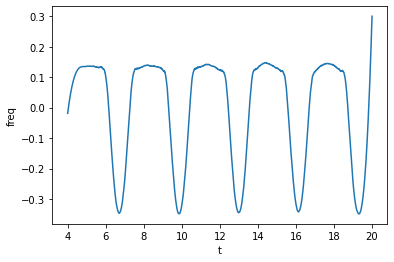

In [14]:
plot(gw_complex.phase_frequency(tsmooth=1.5), lab1="freq")

Next, we will take a Fourier transform. Before, let's pretend that the signal was in geometrized units (as in simulations), and let's make it physical assuming a scale of $M = 1 M_\odot$. For that, use the [unitconv](../unitconv.rst) module. We define a CU object that knows how to convert units.

In [15]:
CU = uc.geom_umass_msun(1) 

# How to convert from geometrized length to physical length?
# Simply multiply times CU.length. Let's check that it is 1.477 km
CU.length  # m

1476.6436994724972

Now we rescale `gw`, assuming that `y` is strain times distance (as usually is). Let's assume a distance of 500 Mpc.

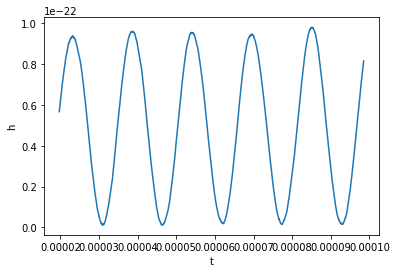

In [16]:
d_Mpc = 500

# inverse = True means from geometrized to physical
gw_physical = gw_complex.time_unit_changed(CU.time, inverse=True)  

gw_physical *= CU.length  # dh -> dh physical
# Now just the strain, since we assume a distance
gw_physical /= (d_Mpc * uc.MEGAPARSEC_SI)

# We have to manually add the redshift
gw_physical.redshifted(luminosity_distance_to_redshift(d_Mpc))

plot(gw_physical.real(), lab1="h")

Okay, now before taking the Fourier transform, we will remove the mean and window our signal. A Tukey window will work.

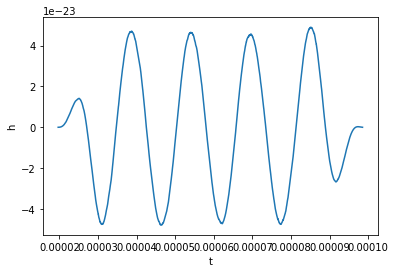

In [17]:
gw_physical.mean_remove()
gw_physical.tukey_window(0.3)
plot(gw_physical.real(), lab1="h")

Finally, we can take the Fourier transform. This is easy to do:

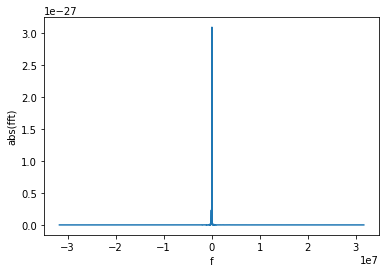

In [18]:
gw_fft = gw_physical.to_FrequencySeries()

# Plotting the amplitude of the Fourier transform
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

The new object is a `FrequencySeries`. It is very similar to a `TimeSeries` and it shares several properties, methods, and features. 

Let's restrict to only positive frequencies close to zero.

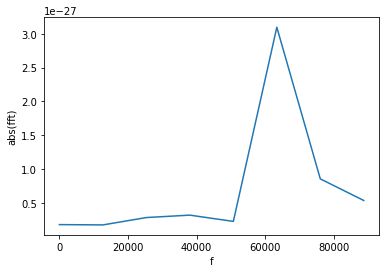

In [19]:
gw_fft.crop(0, 1e5)
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")

We can find the frequency of that peak! For this, we find all the peaks with amplitude larger than 1e-27.

Frequency: 64212.08


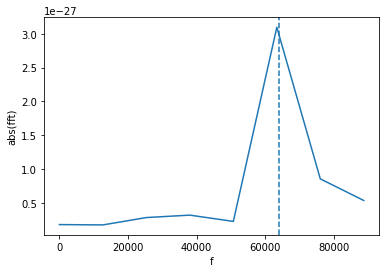

In [20]:
f_peak = gw_fft.peaks_frequencies(1e-27)[0]

print(f"Frequency: {f_peak:.2f}")
plot(gw_fft.abs(), lab1="abs(fft)", lab2="f")
plt.axvline(f_peak, ls = 'dashed')

The line is not on the maximum because we use a quadratic interpolation to find a more accurate location of the peak.

Sometimes, it is useful to ignore some data (or example, when we know that the data is invalid). `Series` objects support _masks_ to mark the points we want to ignore. Most functions work transparently with masks: for example, if you ask for the mean of a `Series`, the masked point will be ignored. Other functions do not support masks (most notably, splines). In that case, it is best to completely remove the masked points and work with clean data.

In [21]:
# Let's mask all the point in the spectrum with value larger than 1e-27

spectrum = gw_fft.abs()

print(f"Maximum without mask {spectrum.max():.3e}")

# Apply mask
spectrum.mask_greater(1e-27)

print(f"Maximum with mask {spectrum.max():.3e}")

print(f"Length with mask {len(spectrum)}")

# Remove points
spectrum.mask_remove()

print(f"Length after having removed the masked points {len(spectrum)}")

Maximum without mask 3.097e-27
Maximum with mask 8.540e-28
Length with mask 8
Length after having removed the masked points 7
